# Project - Mushroom

### Problem Statement :

We have been given a data file on mushroom species and we need to classify them as edible or poisonous.

### Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Calling & renaming the dataset 'mushroom dataset' as df.

In [2]:
df=pd.read_csv('/Users/Shivani/Desktop/mushroom_dataset.csv')
df 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Checking the data shape

In [3]:
df.shape

(8124, 23)

### Obtaining the column names inolved in our dataset.

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Checking the data-types under the respective columns.

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



To begin with working on the mushroom dataset , we convert the alphabetic values of the data in the numeric form.

### Label encoder to convert the dataset

The given dataset is has values in string format , to make it ready for machine learning testing we transform the the given values into numeric data by LabelEncoder method.



In [6]:
le=preprocessing.LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


### Checking if there are any null values in our dataset.



In [7]:
df.isnull()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Visual Representation of Null-Values

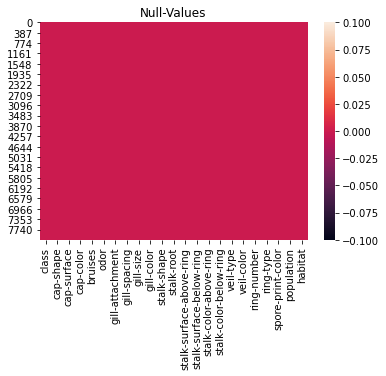

In [8]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

There are no null-values in the dataset.

### Adding the total number of null values , if there's any.



In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no column/row or entity with null value.

### Checking the not null values in our dataset.



In [10]:
df.notnull()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8120,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8121,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8122,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


### Checking the total number of values in our dataset , if it is not null. 

In [11]:
df.notnull().sum()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

Observation :-

These are the total values placed in the respective columns.

For example :-
column -"population" has --> 8124 numbers of total values listed in it under the dataset.

### Obtaining the mean ,median and mode values of all the columns respectively.



In [12]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Visual Representation of the data

### Graph for the target variable 'class' of the dataset - Univariate Analysis

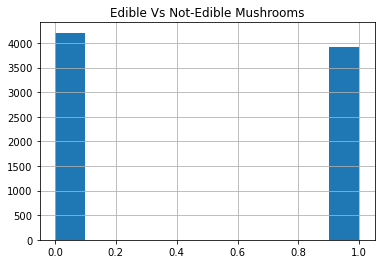

In [13]:
df['class'].hist(grid=True) # analysis on single attribute of the dataset
plt.title('Edible Vs Not-Edible Mushrooms')
plt.show()

The graph shows clearly that there are 2 types of classifications only , either the mushroom is edible or it is poisnous.

### Graphical representation of all the attributes of the dataset

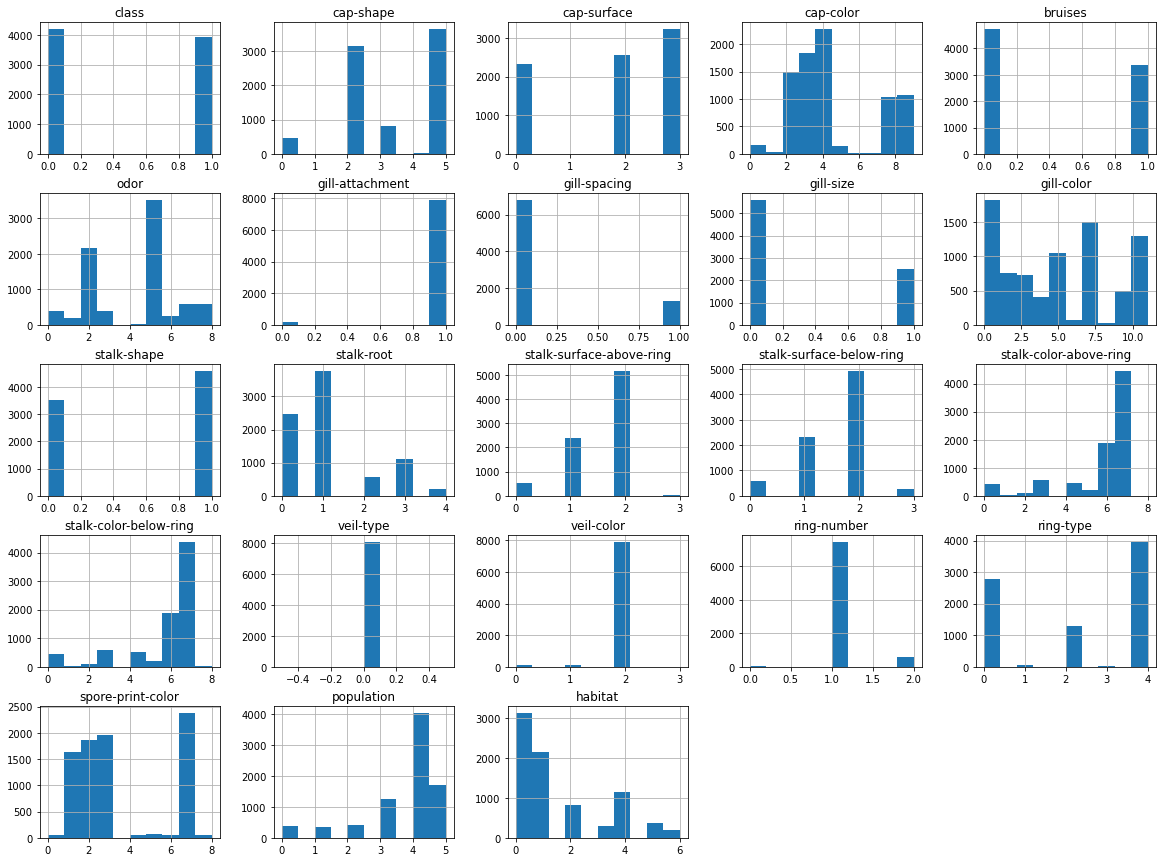

In [14]:
fig = plt.figure(figsize=(20,15)) # univariate analysis on all the attributes of the dataset
ax = fig.gca() 
df.hist(ax=ax)
plt.show()

### Observation :-

- Attributes - 'bruises' , 'gill-atachment','gill-spacing','gill-size'and 'stalk-shape' directly affect the classification of the mushrooms as edible or poisonous, which means these are the factors affecting the mushroom edibilty directly in a yes or no way.

- Rest attributes like 'ring-type','stalk-root' etc somehow affect the classification of mushrooms but does not clearly categorise them as edible or poisonous , further analysis has to be done on the basis of which classification can be predicted.

## Bivariate Analysis 

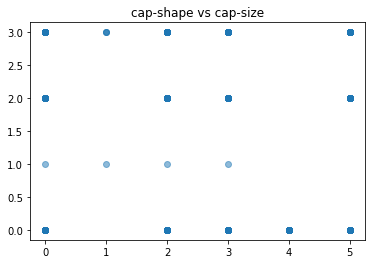

In [15]:
plt.scatter(df['cap-shape'],df['cap-surface'],alpha=0.5) # analysis with 2 variables i.e 2 attributes of the dataset
plt.title('cap-shape vs cap-size')
plt.show()

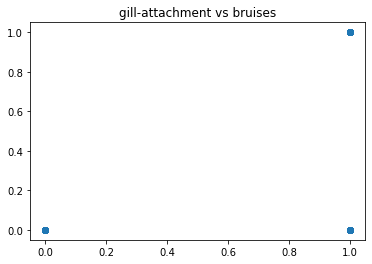

In [16]:
plt.scatter(df['gill-attachment'],df['bruises'],alpha=0.5)
plt.title('gill-attachment vs bruises')
plt.show()

## Observing Correlation - Multivariate Analysis

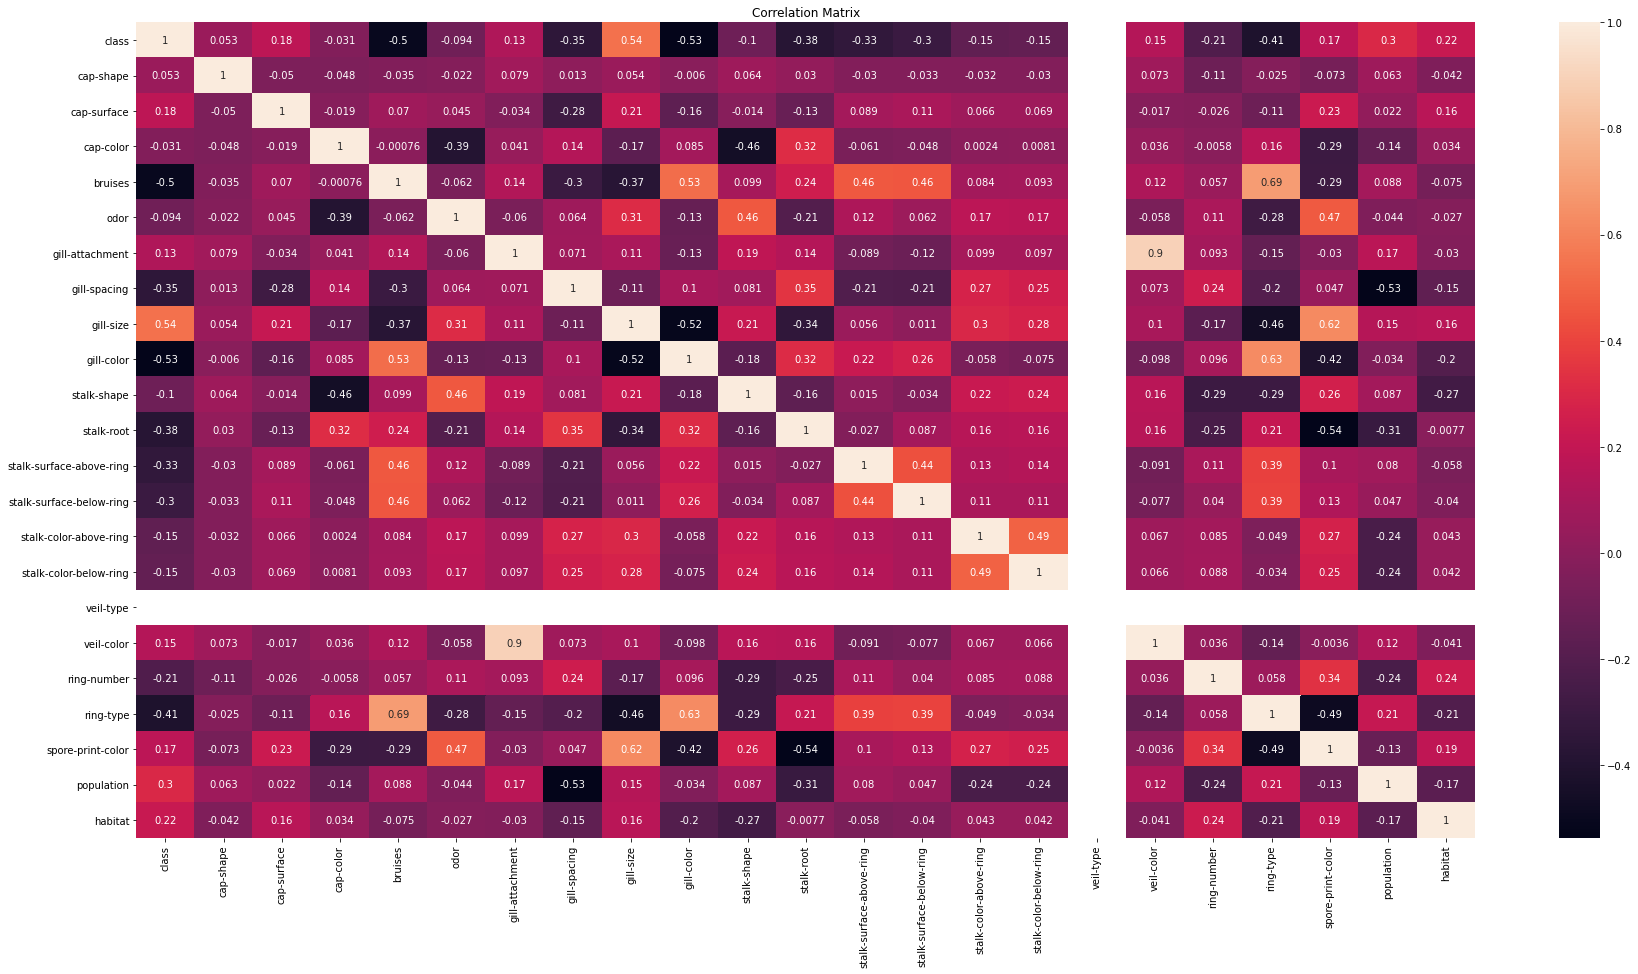

In [17]:
corr_mat=df.corr()

plt.figure(figsize=[30,15])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

The graph indicates the correlation between the attributes which affect the edibility of the mushrooms.
- The darker the shade lower is the correlation between the attributes.
- The bright shades has comparatively high correlation with the attributes.
- The attributes 'veil-type' has no correlation with any attribute which implies that it does not affect the target variable 'class' , the edibilty of the mushroom.

### Correlation value of the attributes

In [18]:
corr_matrix=df.corr()
corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

- The attribute 'gill-size' is having the highest correlation value among all the attributes,directly affecting the classification of mushroom as edible or poisonous.
- The attribute 'gill-color' is having the lowest correlation value as negative value which shows that it's relation with classification/target variable is inversly proportional i.e if gill-color value increases then target value decreases or vice-versa.
- The attribute 'veil-type' has NaN value as the correlation value which means that it does not affect the target variable , neith directly nor inversly.

In [19]:
df=df.drop('veil-type',axis=1)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


## Checking the data distribution and skewness present in all the columns.

In [20]:
# splitting the target variable from the dataset.
x=df.drop('class',axis=1)
y=df['class']

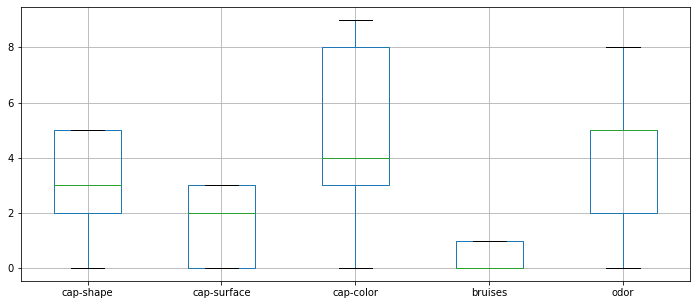

In [21]:
# plotting boxplots for first 5 columns
x.iloc[:,0:5].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

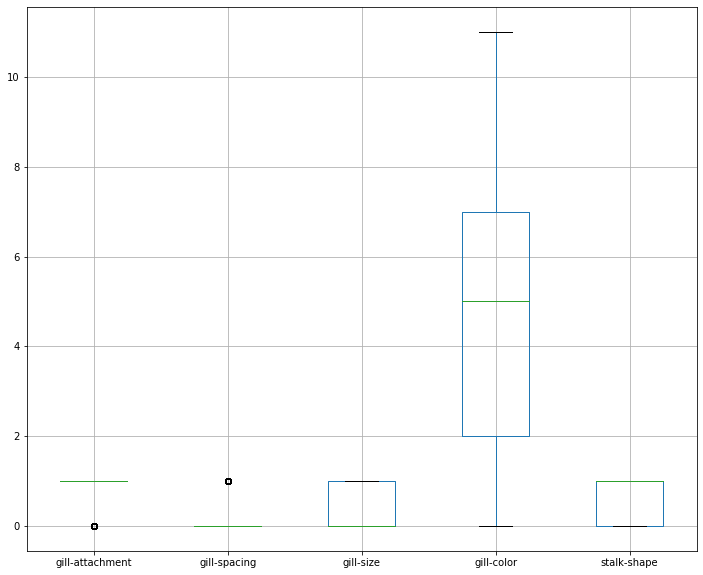

In [22]:
x.iloc[:,5:10].boxplot(figsize=[12,10])
plt.show()

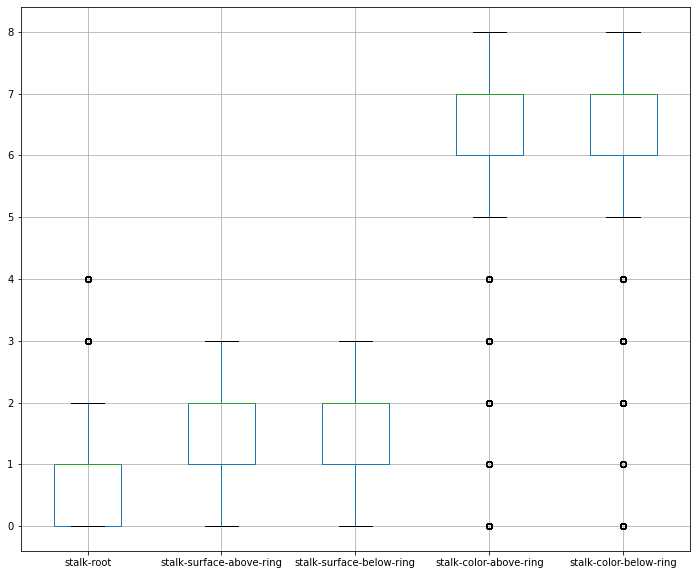

In [23]:
x.iloc[:,10:15].boxplot(figsize=[12,10])
plt.show()

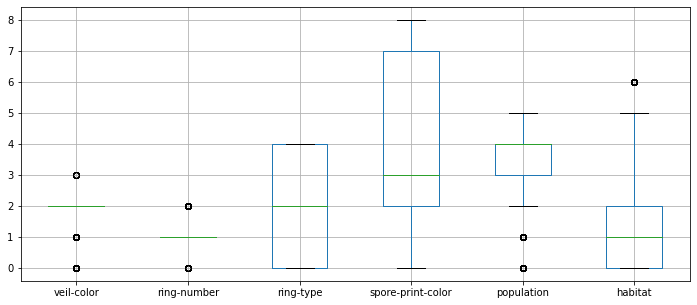

In [24]:
x.iloc[:,15:22].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

In [25]:
# checking skewness
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

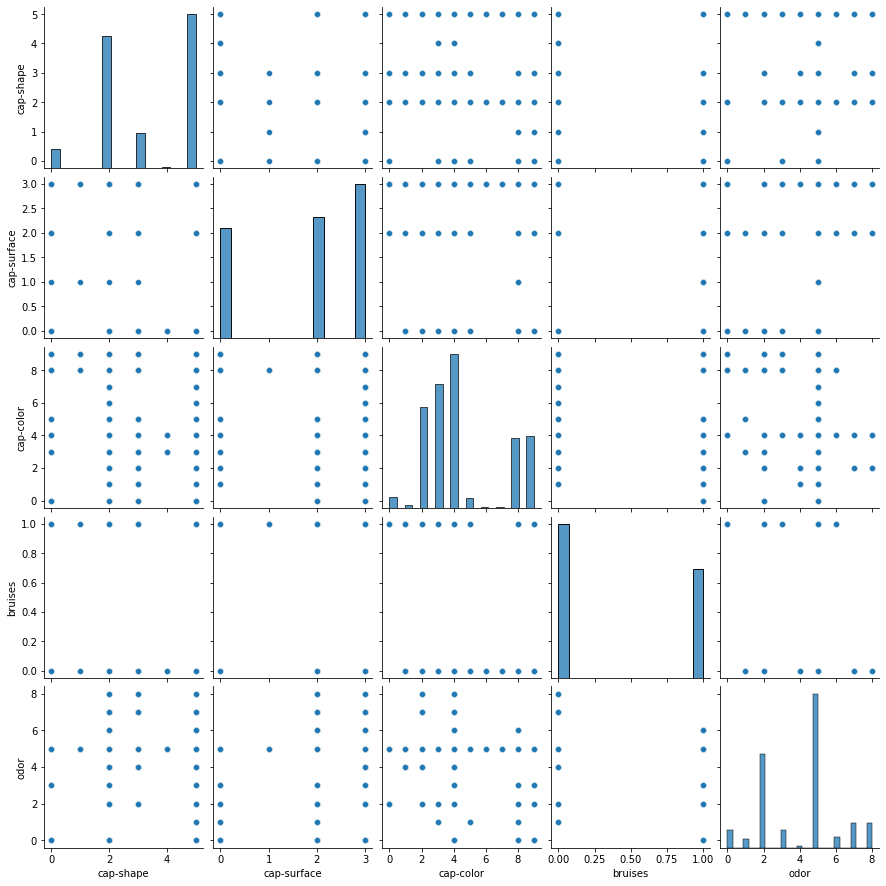

In [26]:
sns.pairplot(x.iloc[:,0:5])
plt.show()

In [27]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [28]:
df_new.skew()

cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

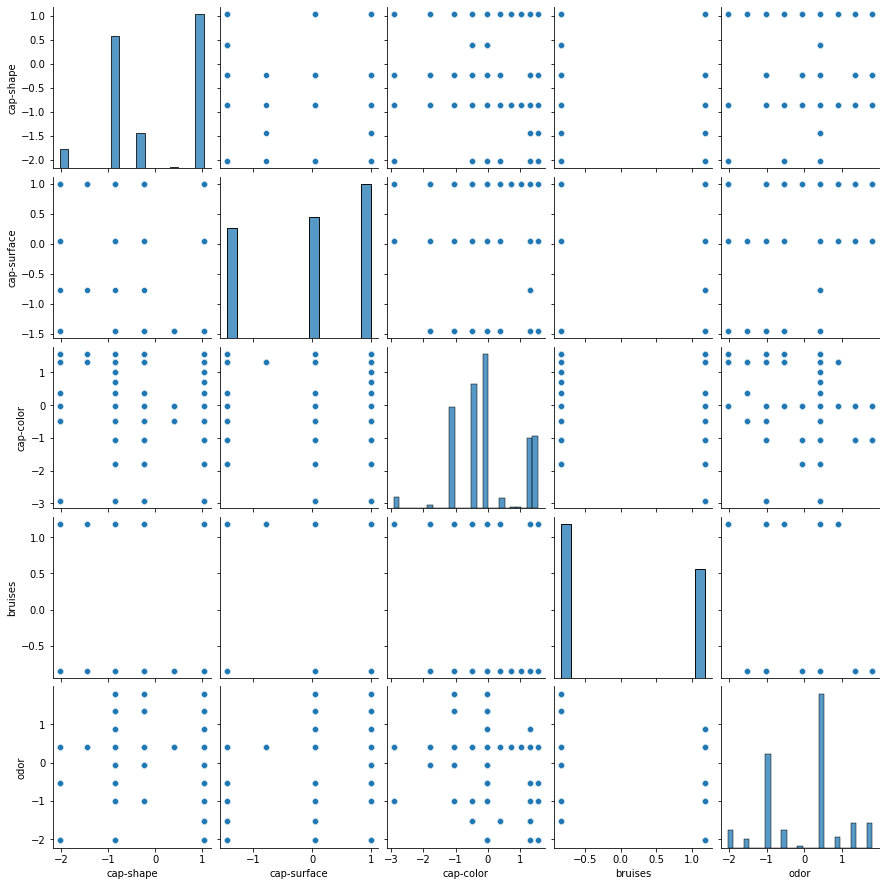

In [29]:
sns.pairplot(df_new.iloc[:,0:5])
plt.show()

## Removing the outliers

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [31]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123]), array([15, 14, 15, ..., 16,  6, 16]))


In [32]:
print(np.where(z<3))

(array([   0,    0,    0, ..., 8123, 8123, 8123]), array([ 0,  1,  2, ..., 19, 20, 21]))


In [33]:
df=df[(z<3).all(axis=1)]
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,3,3,2,0,8,1,0,1,0,...,1,1,6,6,2,1,0,7,4,0
8116,1,3,3,4,0,7,1,0,1,0,...,2,1,6,7,2,1,0,7,4,2
8117,1,3,2,2,0,8,1,0,1,0,...,1,2,6,7,2,1,0,7,4,0
8118,1,3,3,4,0,2,1,0,1,0,...,1,2,6,7,2,1,0,7,4,0


In [34]:
x=df.drop('class',axis=1)
y=df['class']

In [35]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
maxAccuracy=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccuracy:
        macAccuracy=acc
        maxRS=i
print('The best accuracy is', maxAccuracy,' on Random state',maxRS)

The best accuracy is 0  on Random state 199


### Testing Models :-

Now , we will you this predicted best random state 199 for testing different classifier models.

In [37]:
x.shape   # x is the dependent variable.

(6568, 21)

In [38]:
y.shape   # y is the target variable

(6568,)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=22,random_state=199)

### Naive Bayes Classifeir Model testing -

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [41]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predictionmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predictionmnb))
print(confusion_matrix(y_test,predictionmnb))
print(classification_report(y_test,predictionmnb))

0.8181818181818182
[[13  1]
 [ 3  5]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.83      0.62      0.71         8

    accuracy                           0.82        22
   macro avg       0.82      0.78      0.79        22
weighted avg       0.82      0.82      0.81        22



In [42]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predictiongnb=gnb.predict(x_test)
print(accuracy_score(y_test,predictiongnb))
print(confusion_matrix(y_test,predictiongnb))
print(classification_report(y_test,predictiongnb))

0.8181818181818182
[[13  1]
 [ 3  5]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.83      0.62      0.71         8

    accuracy                           0.82        22
   macro avg       0.82      0.78      0.79        22
weighted avg       0.82      0.82      0.81        22



### Support Vecotr Classifier model testing -

In [43]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predictionsvc=svc.predict(x_test)
print(accuracy_score(y_test,predictionsvc))
print(confusion_matrix(y_test,predictionsvc))
print(classification_report(y_test,predictionsvc))

1.0
[[14  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [44]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predictionsvc=svc.predict(x_test)
print(accuracy_score(y_test,predictionsvc))
print(confusion_matrix(y_test,predictionsvc))
print(classification_report(y_test,predictionsvc))

1.0
[[14  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [45]:
def svckernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predictionsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predictionsvc))
    print(confusion_matrix(y_test,predictionsvc))
    print(classification_report(y_test,predictionsvc))

In [46]:
svckernel('poly')

1.0
[[14  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [47]:
svckernel('rbf')

1.0
[[14  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



### Decision Tree Classifier model testing -

In [48]:
# decision tree classifier (criterion='gini') -- default
# decision trees classifier(criterion='entropy')
# gini and entropy
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_test,y_test)
predictiondtc=dtc.predict(x_test)
print(accuracy_score(y_test,predictiondtc))
print(confusion_matrix(y_test,predictiondtc))
print(classification_report(y_test,predictiondtc))

1.0
[[14  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



### Nearest neighbors model testing -

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predictionknn=knn.predict(x_test)
print(accuracy_score(y_test,predictionknn))
print(confusion_matrix(y_test,predictionknn))
print(classification_report(y_test,predictionknn))

1.0
[[14  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [50]:
def kneighbors(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    predictionknn=knn.predict(x_test)
    print(accuracy_score(y_test,predictionknn))
    print(confusion_matrix(y_test,predictionknn))
    print(classification_report(y_test,predictionknn))

In [51]:
kneighbors(3)

1.0
[[14  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [52]:
kneighbors(5)

1.0
[[14  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [53]:
kneighbors(6)

1.0
[[14  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [54]:
kneighbors(7)

1.0
[[14  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



## Finding out the Cross Validation Score for each model tested

In [55]:
from sklearn.model_selection import cross_val_score

### MultinomialNB Model

In [56]:
cvs=cross_val_score(mnb,x,y,cv=5)
print('The cross validation score for MultinomialNB model is :',cvs.mean(),'.')
print('The difference between accuracy and crossvalidation score is : 2 .')

The cross validation score for MultinomialNB model is : 0.8001447879245248 .
The difference between accuracy and crossvalidation score is : 2 .


### GaussianNB Model

In [57]:
cvs=cross_val_score(gnb,x,y,cv=5)
print('The cross validation score for GaussianNB model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is : -2 .')

The cross validation score for GaussianNB model is : 0.8369751727543671
The difference between accuracy and crossvalidation score is : -2 .


### Support Vector Classifier Model

In [58]:
cvs=cross_val_score(svc,x,y,cv=5)
print('The cross validation score for SupportVectorClassification model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.06.')

The cross validation score for SupportVectorClassification model is : 0.9427590388122058
The difference between accuracy and crossvalidation score is :0.06.


### Nearest Neighbor Model

In [59]:
cvs=cross_val_score(knn,x,y,cv=5)
print('The cross validation score for NearestNeighbor model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.06.')

The cross validation score for NearestNeighbor model is : 0.9427620528122359
The difference between accuracy and crossvalidation score is :0.06.


### Decision Tree Classifier model

In [60]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for DecisionTreeClassifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.03.')

The cross validation score for DecisionTreeClassifier model is : 0.969550253233964
The difference between accuracy and crossvalidation score is :0.03.


- The minimum difference between the accuracy score and cross validatio score is for the Decision Tree Clasifier Model (0.03) so this is our best model.

## Hyper Parameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# creating parameter list to pass in GridSearchCV

parameters = {'max_depth': np.arange(2,15),'criterion':['gini','entropy']}

In [63]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [64]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [65]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [66]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [67]:
accuracy_score(y_test,GCV_pred)

1.0

## Saving the model

In [68]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(dtc,open('pickledtcfile','wb'))

In [69]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])